## Линейная регрессия

### Импорт нужных библиотек

In [2]:
import operator

import numpy as np
import pandas as pd # Для работы с данными
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

### Импрорт класса линейной регрессии

In [3]:
from sklearn.linear_model import LinearRegression # линейная регрессия

### Читаем csv и показываем первые пять записей

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/ahartz1/car-linear-regression/master/car_data.csv', delimiter=',')
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


### Кол-во данных

In [5]:
data.shape

(804, 12)

### Задаем X и Y

In [6]:
X = data[['Mileage']]
Y = data['Price']

### Проверяем записи

In [7]:
X.shape, Y.shape

((804, 1), (804,))

### Обучаем модель

In [8]:
model = LinearRegression()
model.fit(X, Y) #Обучение модели

LinearRegression()

### Проверяем коэфициент $$y = Xw + b$$

In [9]:
model.coef_ #w

array([-0.1725205])

In [10]:
model.intercept_ #b

np.float64(24764.559006061685)

### Проверяем как предсказывает модель

In [11]:
y_predict = model.predict(X) #Получаем предсказонное значение
y_predict.shape

(804,)

### Рисуем график

<function matplotlib.pyplot.show(close=None, block=None)>

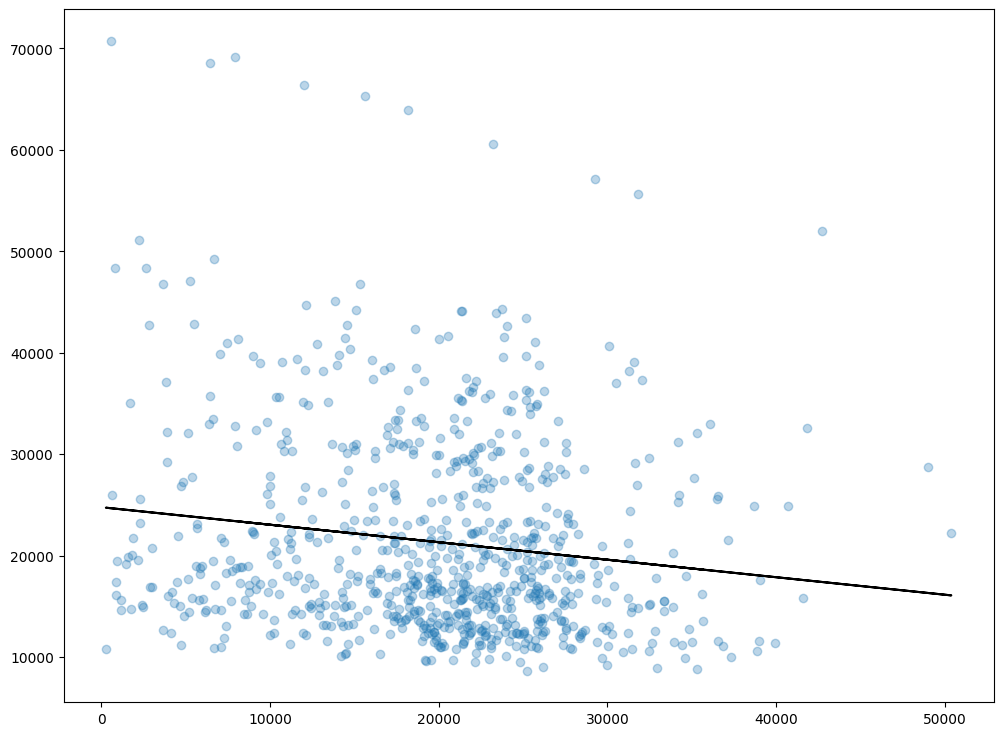

In [12]:
plt.figure(figsize=(12,9))
plt.plot(X, Y, 'o', alpha=0.3)
plt.plot(X, y_predict, 'k-',)
plt.show

### Средняя ошибка

In [13]:
np.mean(np.abs(y_predict - Y))

np.float64(7596.280022565475)

In [14]:
Y.mean()

np.float64(21343.143767325837)

<p>Несмотря на то, что зависимость от пробега наблюдаема, но она не столь существенна, чтобы эффективно описать данные, как видим на графике. Нужно что-то поумнее.</p>

### Берем несколько параметров


In [15]:
X = data.loc[:, ['Mileage', 'Liter']]
X.head()

,Mileage,Liter
0,8221,3.1
1,9135,3.1
2,13196,3.1
3,16342,3.1
4,19832,3.1


In [16]:
Y = data.Price
Y.head() #Предсказываемая цена

0    17314.103129
1    17542.036083
2    16218.847862
3    16336.913140
4    16339.170324
Name: Price, dtype: float64

### Обучаем регрессию

In [17]:
model.fit(X, Y)
y_predict = model.predict(X)

### Проверка ошибки и коэфициентов

In [18]:
np.mean(np.abs(y_predict - Y))

np.float64(6363.046747027265)

In [19]:
model.coef_

array([-1.60028545e-01,  4.96827812e+03])

In [20]:
model.intercept_

np.float64(9426.601468836647)

### Нарисуем график

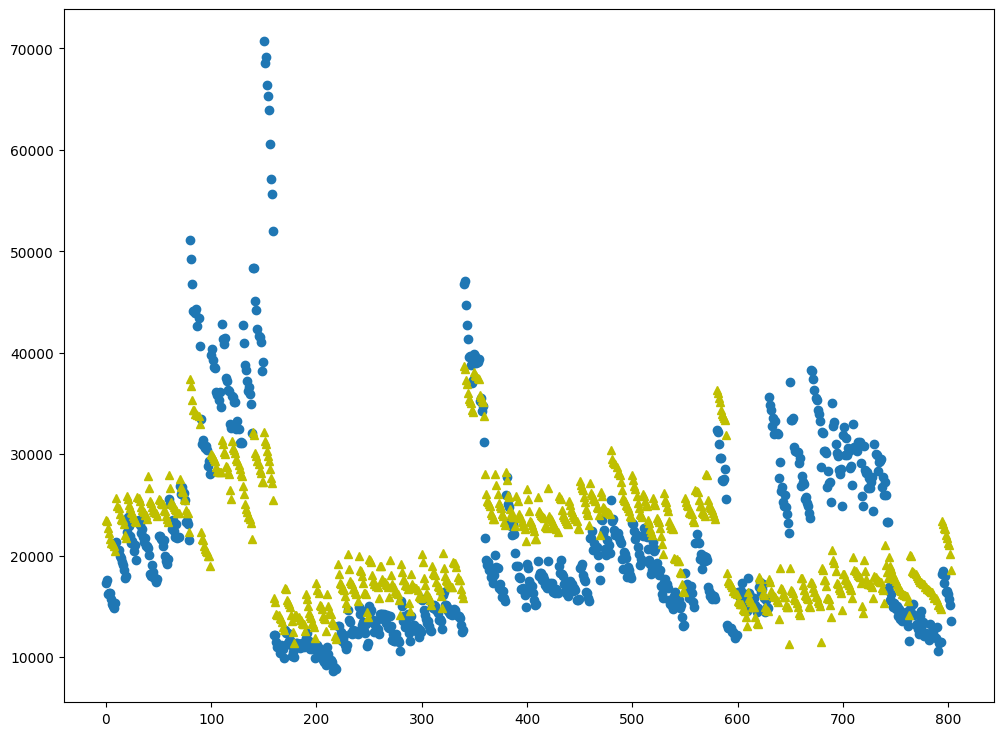

In [21]:
plt.figure(figsize=(12,9))
plt.plot(Y.index, Y, 'o')
plt.plot(Y.index, y_predict, 'y^')
plt.show()

### Добавляем зависимость от марки автомобиля

In [22]:
data.Make.unique()#Ищем уникальные значения

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [23]:
X = pd.get_dummies(data[['Mileage', 'Make', 'Liter']])
Y = data.Price

In [24]:
X

,Mileage,Liter,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,8221,3.1,True,False,False,False,False,False
1,9135,3.1,True,False,False,False,False,False
2,13196,3.1,True,False,False,False,False,False
3,16342,3.1,True,False,False,False,False,False
4,19832,3.1,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
799,16229,3.0,False,False,False,False,False,True
800,19095,3.0,False,False,False,False,False,True
801,20484,3.0,False,False,False,False,False,True
802,25979,3.0,False,False,False,False,False,True


### Обучение модели

In [25]:
model = LinearRegression()
model.fit(X, Y)
y_predict = model.predict(X)

In [26]:
np.abs(y_predict - Y).mean()

np.float64(2307.880053472038)

### Строим график

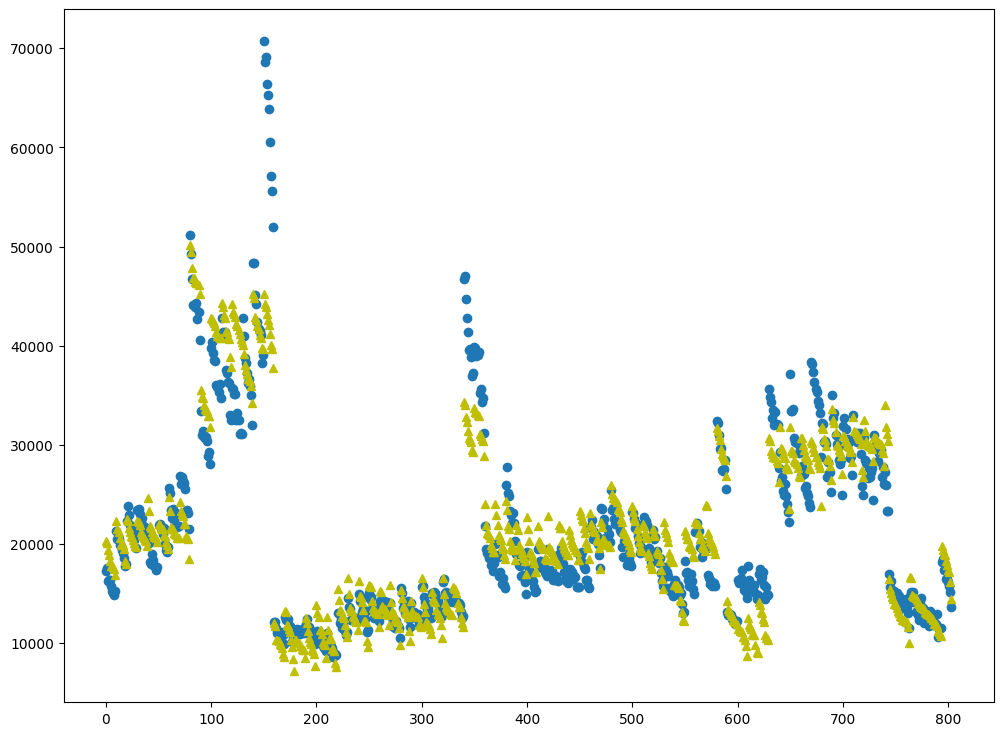

In [27]:
plt.figure(figsize=(12,9))
plt.plot(Y.index, Y, 'o')
plt.plot(Y.index, y_predict, 'y^')
plt.show()

## Полиномиальная регрессия
<p id="4">Не всегда данные могут быть описаны (достаточно эффективно) линейной моделью. В некоторых задачах часто строятся полиномиальные модели. Здесь появляется дополнительный гиперпараметр - максимальная степень, в  которой могут находится параметры для описанния данных

#### Практика на собственном датасете.

 <p id="5">Сгенерируем свой собственный датасет для задачи полиномиальной регрессии.</p>

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
num_points = 40

np.random.seed(0)

x = 2 - 3 * np.random.normal(0, 1, num_points)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, num_points) # заданы параметры при степенях

# преобразуем данный чтобы добавить новые оси
x = x[:, np.newaxis]
# y = y[:, np.newaxis]
x.shape, y.shape

((40, 1), (40,))

### Выводим данные на график

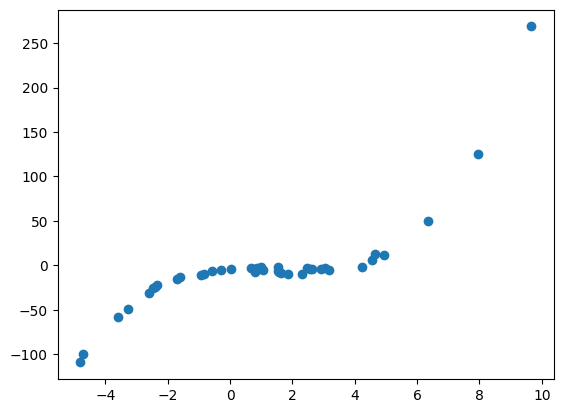

In [30]:
plt.scatter(x, y)
plt.show()

### Обучаем линейную регрессию

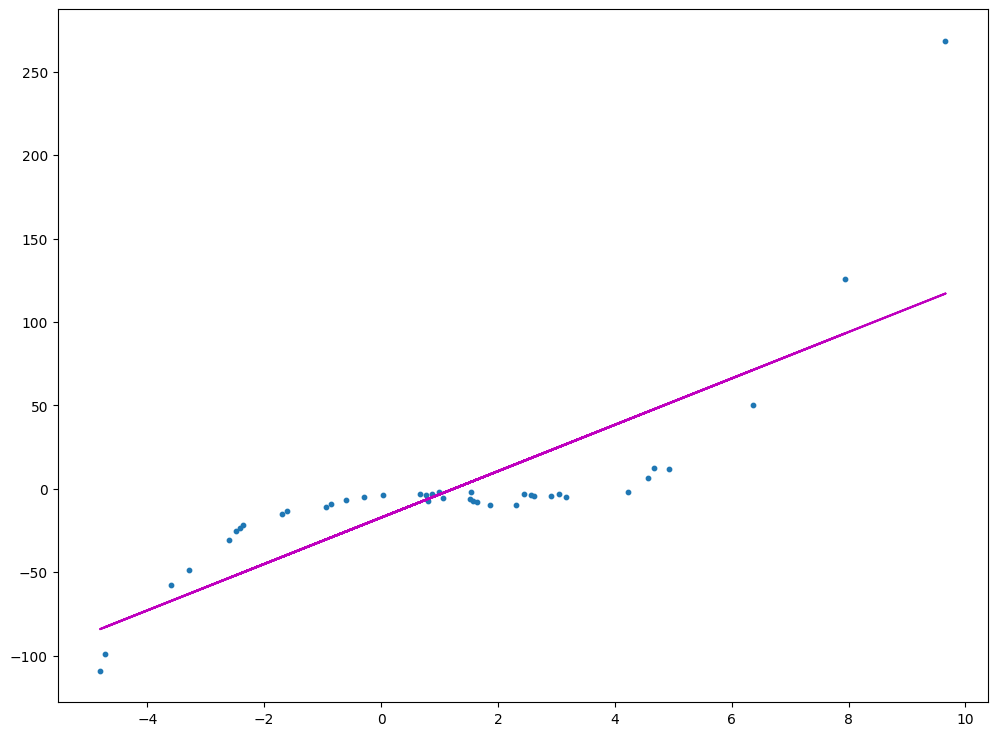

In [31]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.figure(figsize=(12,9))
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='m')
plt.show()

In [32]:
np.mean(np.abs(y - y_pred))

np.float64(23.096401457149184)

### Обучаем полиномиальную регрессию

In [33]:
# sklearn генерирует допольнительное кол-во признаков для полиномиальной регресии
polynomial_features = PolynomialFeatures(degree=2) # указываем вторую степень полинома
x_poly = polynomial_features.fit_transform(x) # получаем новые признаки
x_poly.shape

(40, 3)

In [34]:
x_poly[:3]

array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656]])

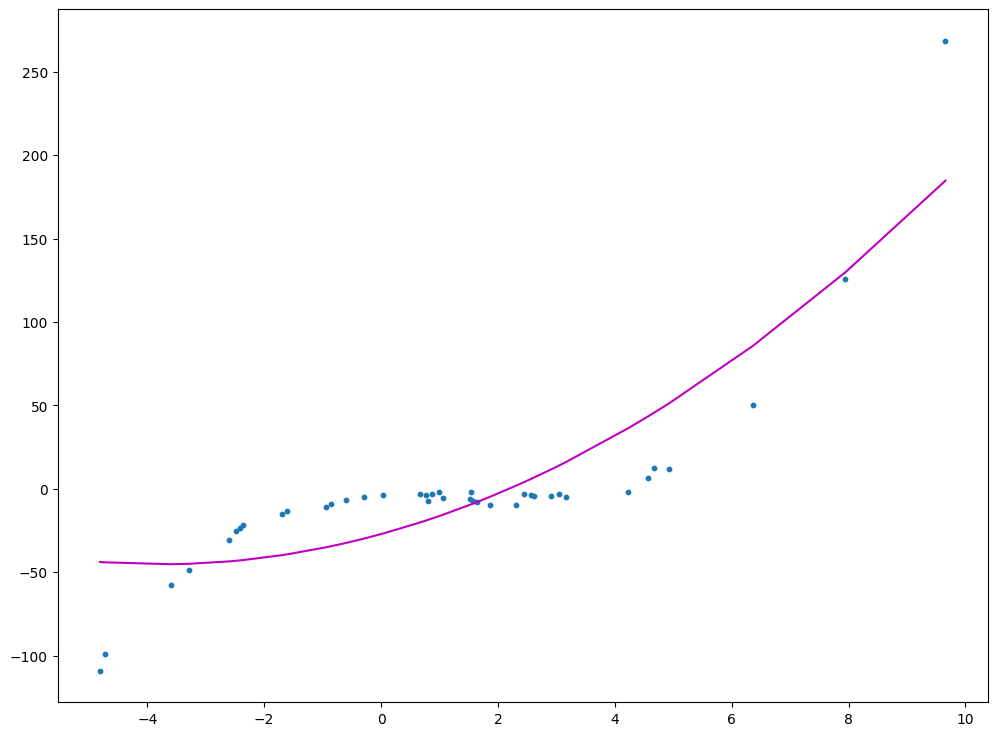

In [35]:
# теперь подаем эти признаки в линейную регресиию
# и проделаем все те же самые операции
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

plt.figure(figsize=(12,9))
plt.scatter(x, y, s=10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x_, y_poly_pred = zip(*sorted_zip)

plt.plot(x_, y_poly_pred, color='m')
plt.show()

### Попробуем степень 3

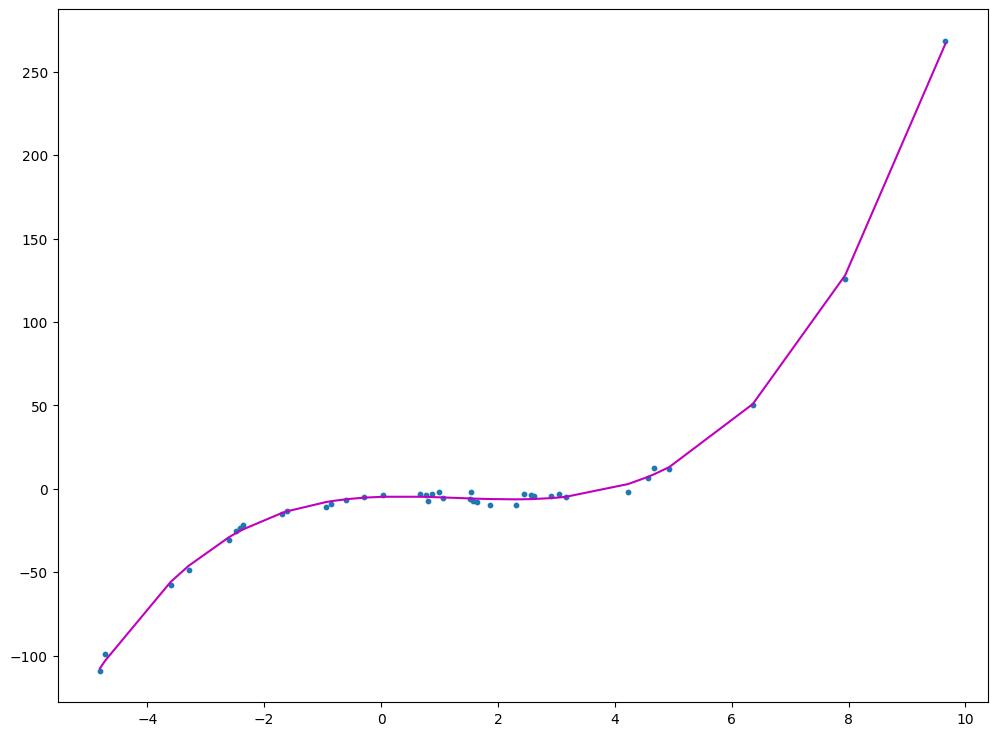

In [36]:
polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

plt.figure(figsize=(12,9))
plt.scatter(x, y, s=10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x_, y_poly_pred = zip(*sorted_zip)

plt.plot(x_, y_poly_pred, color='m')
plt.show()

In [37]:
y_poly_pred = model.predict(x_poly)
np.mean(np.abs(y - y_poly_pred))

np.float64(1.902981521577697)

In [38]:
model.coef_

array([ 0.        ,  1.11297528, -1.8836304 ,  0.48462582])

In [39]:
model.intercept_

np.float64(-4.8460111108561685)